# 2 Exploratory Data Analysis<a id='2_exploratory_data_analysis'></a>

In [1]:
# Import libraries
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import talib as ta
from visuals import *
from helpers import *

## 2.1 Load Data

In [2]:
# Set this to svg when publishing to GitHub so plotly images are static
renderer = 'svg'

In [3]:
# Data directory references
intermediate_dir = r'..\data\intermediate'

In [4]:
btc = pd.read_csv(os.path.join(intermediate_dir, 'btc.csv'), parse_dates=['date'])
btc = btc.set_index('date')
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2019-11-01 to 2021-06-17
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   asset_id                 595 non-null    int64  
 1   time                     595 non-null    int64  
 2   open                     595 non-null    float64
 3   close                    595 non-null    float64
 4   high                     595 non-null    float64
 5   low                      595 non-null    float64
 6   volume                   595 non-null    float64
 7   market_cap               595 non-null    float64
 8   url_shares               595 non-null    float64
 9   unique_url_shares        595 non-null    float64
 10  reddit_posts             595 non-null    int64  
 11  reddit_posts_score       595 non-null    float64
 12  reddit_comments          595 non-null    int64  
 13  reddit_comments_score    595 non-null    float64
 14  tweets 

In [5]:
doge = pd.read_csv(os.path.join(intermediate_dir, 'doge.csv'), parse_dates=['date'])
doge = doge.set_index('date')
doge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2019-11-01 to 2021-06-17
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   asset_id                 595 non-null    int64  
 1   time                     595 non-null    int64  
 2   open                     595 non-null    float64
 3   close                    595 non-null    float64
 4   high                     595 non-null    float64
 5   low                      595 non-null    float64
 6   volume                   595 non-null    float64
 7   market_cap               595 non-null    float64
 8   url_shares               595 non-null    float64
 9   unique_url_shares        595 non-null    float64
 10  reddit_posts             595 non-null    int64  
 11  reddit_posts_score       595 non-null    float64
 12  reddit_comments          595 non-null    int64  
 13  reddit_comments_score    595 non-null    float64
 14  tweets 

## 2.2 Technical Analysis

In the modeling stage of this project, I will be exploring a novel approach referenced in this [research paper](https://www.researchgate.net/publication/324802031_Algorithmic_Financial_Trading_with_Deep_Convolutional_Neural_Networks_Time_Series_to_Image_Conversion_Approach) using a Deep Convolutional Neural Networks to predict the Buy/Hold/Sell decision by converting time series data to images.  In this approach the researchers utilized a variety of technical analysis metrics for the image creation.

Technical analysis is the term used to evaluate investments and identify trading opportunities based on trends and patterns.  I will be using the talib library to supplement the coin price and social meedia metrics from lunarCRUSH API.  All of the functions for TA-Lib can be found [here](https://mrjbq7.github.io/ta-lib/doc_index.html).  Below is a summary of each metric that I will analyze in this phase.

Overlap Studies
1. Bollinger Bands (BBANDS)
2. Simple Moving Average (SMA)
3. Exponential Moving Average (EMA)
4. Double Exponential Moving Average (DEMA)
5. Triple Exponential Moving Average (TEMA)
6. Weighted Moving Average (WMA)

Momentum Indicators:
1. Average Directional Movement Index (ADX)
2. Absolute Price Oscillator (APO)
3. Commodity Channel Index (CCI)
4. Chande Momentum Oscillator (CMO)
5. Directional Movement Index (DX)
6. Moving Average Convergence/Divergence (MACD)
7. Percentage Price Oscillator (PPO)
8. Rate of Change (ROC)
9. Relative Strength Index (RSI)
10. Williams % R Oscillator (WILLR)

Volatility Indicators
1. Average True Range (ATR)

Statistics
1. Pearson's Correlation Coefficient (CORREL)
2. Linear Regression (LINEARREG)
3. Linear Regression Angle (LINEARREG_ANGLE)
4. Linear Regression Slope (LINEARREG_SLOPE)
5. Standard Deviation (STDEV)

In [6]:
# Print out all of the functions by group
#ta.get_functions()
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

### 2.2.1 Overlap Studies

#### 2.2.1.1 Bollinger Bands

In [7]:
def bband_plot(df, timeperiod, matype, start, renderer):
    coin = set_coin_name(df)
    x_domain = set_x_domain(df)
    x_filter = set_x_filter(df, start)
    bband_upper, bband_middle, bband_lower = ta.BBANDS(df['close'], timeperiod=timeperiod, matype=matype)

    params = dict(vertical_spacing=0.1, row_heights=[1], subplot_titles=(None), 
                        x_domain=x_domain, showlegend=True,
                        title_text=coin+' Bollinger Bands with Buy-Hold-Sell Points',
                        fig_size=(800, 600), xrange=x_filter, renderer=renderer)

    traces = [dict(mode='lines', x=df.index, y=df['close'], name='Close', 
                   line={'color': 'CornFlowerBlue'}),
              dict(mode='lines', x=bband_upper.index, y=bband_upper, name='Upper Band',
                   line={'color': 'DarkGrey', 'dash': 'solid'}),
              dict(mode='lines', x=bband_middle.index, y=bband_middle, name='Middle Band',
                   line={'color': 'DarkGrey', 'dash': 'dash'}),
              dict(mode='lines', x=bband_lower.index, y=bband_lower, name='Lower Band',
                   line={'color': 'DarkGrey', 'dash': 'solid'}),
              dict(mode='markers', x=df.index, y=df['close'], name=None, 
                   marker={'size': 4}, marker_color=df['color'], showlegend=False)
             ]

    single_slider(traces, params)

In [8]:
row_heights = [1, .75]
fig_size = (800, 600)

# Set default start timeframes for the sliders in each plot
btc_start_def = '2021-01-01'
doge_start_def = '2021-04-01'

# Store dataframes in list
dfs = [[btc, btc_start_def], [doge, doge_start_def]]

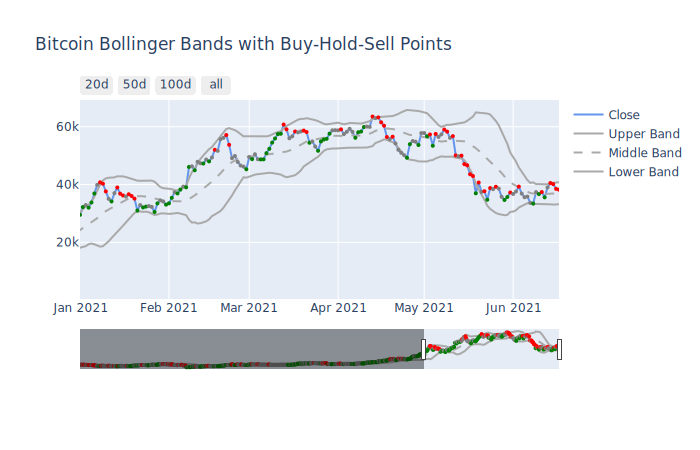

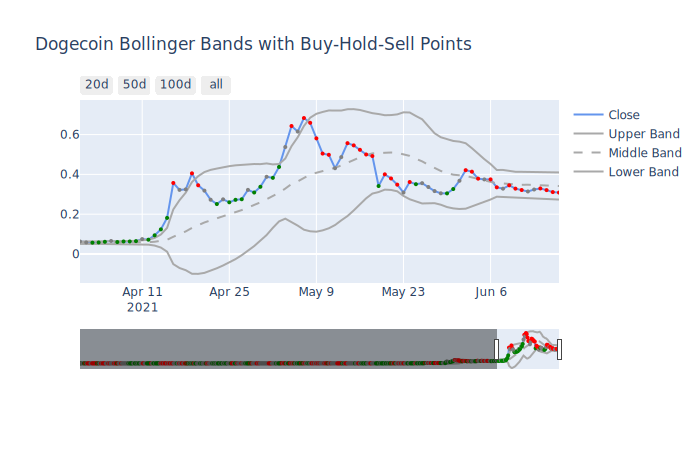

In [9]:
for df in dfs:
    bband_plot(df[0], 20, 0, df[1], renderer)

The bull market will drive the price up to the upper band and it could remain there for a while so not able to firmly develop a strategy to sell when the price breaks the upper band.  When the Close price is straddling the upper band there is a selloff and the price drops.  Vice versa when the price rides along the lower band it is oversold and people reenter the market and the price rises.  I will engineer a feature that quantifies where the current close price is with respect to the bollinger upper and lower bands.

#### 2.2.1.2 Moving Averages

In [10]:
# Moving Averages
def ma_plot(df, timeperiod, ma, exp, start, renderer):
    coin = set_coin_name(df)
    x_domain = set_x_domain(df)
    x_filter = set_x_filter(df, start)
    sma = ta.SMA(df['close'], timeperiod=timeperiod)
    wma = ta.WMA(df['close'], timeperiod=timeperiod)
    ema = ta.EMA(df['close'], timeperiod=timeperiod)
    dema = ta.DEMA(df['close'], timeperiod=timeperiod)
    tema = ta.TEMA(df['close'], timeperiod=timeperiod)

    params = dict(vertical_spacing=0.1, row_heights=[1], subplot_titles=(None), 
                        x_domain=x_domain, showlegend=True,
                        title_text=coin+' Moving Averages (MA) with Buy-Hold-Sell Points',
                        fig_size=(800, 600), xrange=x_filter, renderer=renderer)
    
    traces = [dict(mode='lines', x=df.index, y=df['close'], name='Close', 
                   line={'color': 'CornFlowerBlue'}),
              dict(mode='markers', x=df.index, y=df['close'], name=None, 
                   marker={'size': 4}, marker_color=df['color'], showlegend=False)
             ]
    
    ma_traces = [dict(mode='lines', x=sma.index, y=sma, name='Simple MA (SMA)',
                      line={'dash': 'solid'}),
                 dict(mode='lines', x=wma.index, y=wma, name='Weighted MA (WMA)',
                      line={'dash': 'solid'})]
    ema_traces = [dict(mode='lines', x=ema.index, y=ema, name='Exponential MA (EMA)',
                      line={'dash': 'solid'}),
                 dict(mode='lines', x=dema.index, y=dema, name='Double EMA (DEMA)',
                      line={'dash': 'solid'}),
                 dict(mode='lines', x=tema.index, y=tema, name='Triple EMA (TEMA)',
                      line={'dash': 'solid'})]

    if ma:
        traces.extend(ma_traces)
    if exp:
        traces.extend(ema_traces)

    single_slider(traces, params)

In [11]:
for df in dfs:
    ma_plot(df[0], 20, True, False, df[1], renderer)  

When the WMA crosses above the SMA this is a bullish sign.  Buy at support levels when below the WMA and sell at the resistance levels when above the WMA.

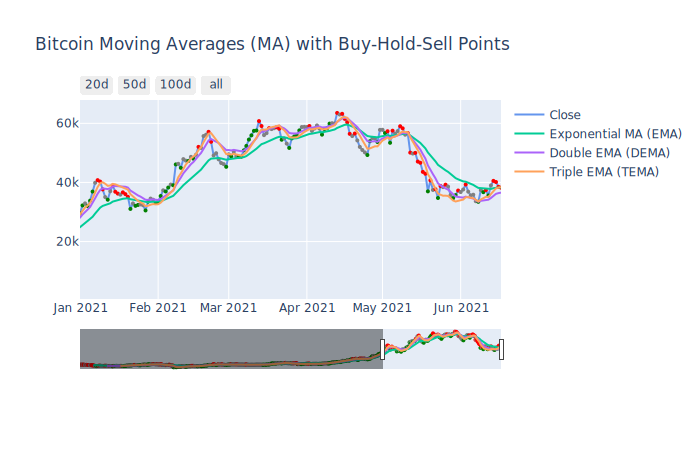

In [12]:
ma_plot(btc, 20, False, True, btc_start_def, renderer)  

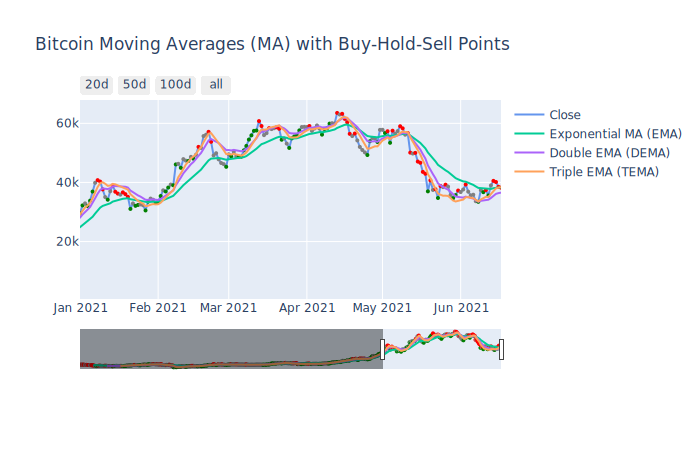

In [13]:
for df in dfs:
    ma_plot(df[0], 20, False, True, df[1], renderer)  

Similar observation for the exponential moving averages.

#### 2.2.1.3 MACD

In [14]:
# MACD
def macd_plot(df, fastperiod, slowperiod, signalperiod, start, renderer):
    coin = set_coin_name(df)
    x_domain = set_x_domain(df)
    x_filter = set_x_filter(df, start)
    macd, macdsignal, macdhist = ta.MACD(df['close'], 
                                         fastperiod=fastperiod, 
                                         slowperiod=slowperiod, 
                                         signalperiod=signalperiod)
    
    macdhist_color = pd.DataFrame(macdhist, columns=['macdhist'])
    macdhist_color['color'] = np.where(macdhist_color["macdhist"] < 0, 'red', 'green')

    params = dict(vertical_spacing=0.1, row_heights=[1, .75], subplot_titles=(None, 'MACD'), 
                  x_domain=x_domain, showlegend=True,
                  title_text=coin+' Buy-Hold-Sell Points with MACD',
                  hlines=[],
                  fig_size=(800, 600), xrange=x_filter, renderer=renderer)

    traces = [dict(mode='lines', x=df.index, y=df['close'], name='Close', 
                   line={'color': 'CornFlowerBlue'}, showlegend=True, row=1),
              dict(mode='markers', x=df.index, y=df['close'], name=None, 
                   marker={'size': 4}, marker_color=df['color'], showlegend=False, row=1),
              dict(mode='lines', x=macd.index, y=macd, name='MACD',
                   line={'dash': 'solid'}, showlegend=True, row=2),
              dict(mode='lines', x=macdsignal.index, y=macdsignal, name='MACD Signal',
                   line={'dash': 'solid'}, showlegend=True, row=2),
              dict(mode='bar', x=macdhist.index, y=macdhist, name='MACD Histogram',
                   marker_color=macdhist_color['color'], showlegend=True, row=2) 
             ]

    stacked_slider(traces, params)

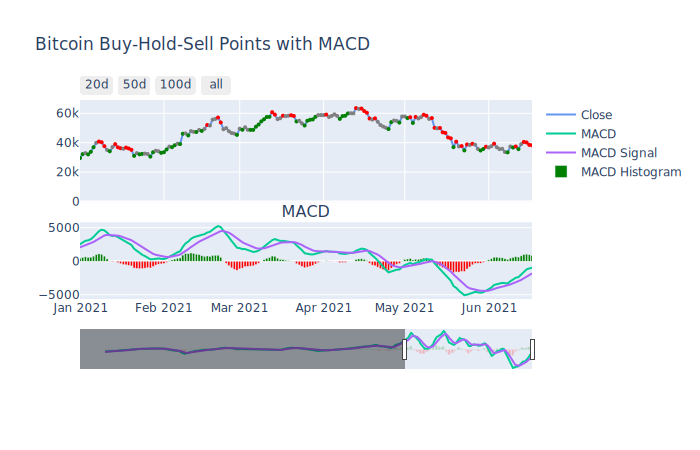

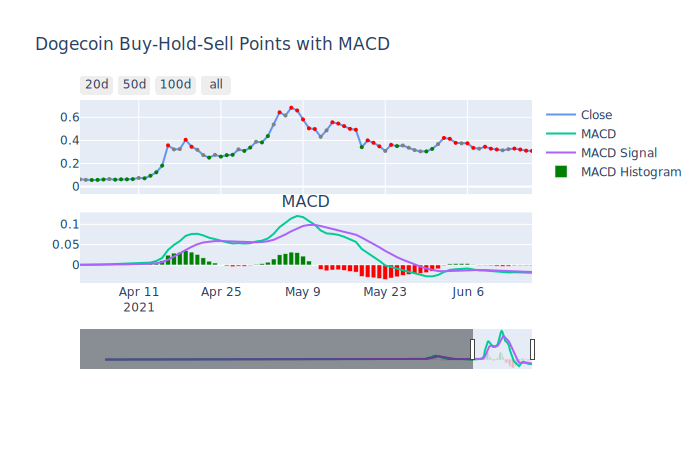

In [15]:
for df in dfs:
    macd_plot(df[0], 12, 26, 9, df[1], renderer)

When the MACD line crosses above the MACD Signal line this is a bullish sign with buy opportunities.  The market will eventually go bearish and drive the MACD back below the Signal from a selloff.

In [16]:
# Single time period metrics
def create_single_tp_metrics(df, timeperiod):
    df_out = df.copy()
    df_out['adx'] = ta.ADX(df_out['high'], df_out['low'], df_out['close'], timeperiod=timeperiod)
    df_out['cci'] = ta.CCI(df_out['high'], df_out['low'], df_out['close'], timeperiod=timeperiod)
    df_out['cmo'] = ta.CMO(df_out['close'],  timeperiod=timeperiod)
    df_out['dx'] = ta.DX(df_out['high'], df_out['low'], df_out['close'], timeperiod=timeperiod)
    df_out['roc'] = ta.ROC(df_out['close'],  timeperiod=timeperiod)
    df_out['rsi'] = ta.RSI(df_out['close'],  timeperiod=timeperiod)
    df_out['willr'] = ta.WILLR(df_out['high'], df_out['low'], df_out['close'], timeperiod=timeperiod)
    df_out['atr'] = ta.ATR(df_out['high'], df_out['low'], df_out['close'], timeperiod=timeperiod)
    df_out['corr'] = ta.CORREL(df_out['high'], df_out['low'], timeperiod=timeperiod)
    df_out['linreg'] = ta.LINEARREG(df_out['close'], timeperiod=timeperiod)
    df_out['angle'] = ta.LINEARREG_ANGLE(df_out['close'], timeperiod=timeperiod)
    df_out['intercept'] = ta.LINEARREG_INTERCEPT(df_out['close'], timeperiod=timeperiod)
    df_out['slope'] = ta.LINEARREG_SLOPE(df_out['close'], timeperiod=timeperiod)
    df_out['stdev'] = ta.STDDEV(df_out['close'], timeperiod=timeperiod, nbdev=1)
    df_out['var'] = ta.VAR(df_out['close'], timeperiod=timeperiod, nbdev=1)
    df_out['tsf'] = ta.TSF(df_out['close'], timeperiod=timeperiod)
    return df_out

In [17]:
# Momentum multiple slow and fast period metrics
def create_multi_tp_metrics(df, fastperiod, slowperiod, signalperiod):
    df_out = df.copy()
    df_out['apo'] = ta.APO(df_out['close'], fastperiod=fastperiod, slowperiod=slowperiod, matype=0)
    df_out['macd'], df_out['macdsignal'], df_out['macdhist'] = ta.MACD(df_out['close'], 
                                                                       fastperiod=fastperiod, 
                                                                       slowperiod=slowperiod, 
                                                                       signalperiod=signalperiod)
    df_out['ppo'] = ta.PPO(df_out['close'], fastperiod=fastperiod, slowperiod=slowperiod, matype=0)
    return df_out

In [18]:
def generic_ta_plot(df, custom_params, sp, mp, start, renderer):
    df_out = df.copy()
    coin = set_coin_name(df)
    col = custom_params['col']
    label = col.upper()
    x_domain = set_x_domain(df)
    x_filter = set_x_filter(df, start)
    if sp:
        df_out = create_single_tp_metrics(df_out, 
                                          sp['timeperiod'])
    if mp:
        df_out = create_multi_tp_metrics(df_out, 
                                          mp['fastperiod'], 
                                          mp['slowperiod'], 
                                          mp['signalperiod'])
    
    params = dict(vertical_spacing=0.1, row_heights=[1, .5], subplot_titles=(None, label), 
                  x_domain=x_domain, showlegend=True,
                  title_text=coin+' Buy-Hold-Sell Points with '+label,
                  hlines=custom_params['hlines'], fig_size=(800, 600), xrange=x_filter, renderer=renderer)

    traces = [dict(mode='lines', x=df.index, y=df['close'], name='Close', 
                   line={'color': 'CornFlowerBlue'}, showlegend=True, row=1),
              dict(mode='markers', x=df.index, y=df['close'], name=None, 
                   marker={'size': 4}, marker_color=df['color'], showlegend=False, row=1),
              dict(mode='lines', x=df_out.index, y=df_out[col], name=label,
                   line={'dash': 'solid'}, showlegend=True, row=2) 
             ]

    stacked_slider(traces, params)

In [19]:
# ADX
custom_params = dict(col='adx', 
                     hlines=[dict(y=25, line_width=1, line_dash='dash', line_color='green', row=2), 
                             dict(y=20, line_width=1, line_dash='dash', line_color='red', row=2)])
sp_params = dict(timeperiod=14)

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

ADX can be used to identify a strong trend.  ADX identifies a strong trend when over 25 and weak trend below 20.  Dogecoin is exhibiting very strong trend patterns this year whereas Bitcoin is oscillating.

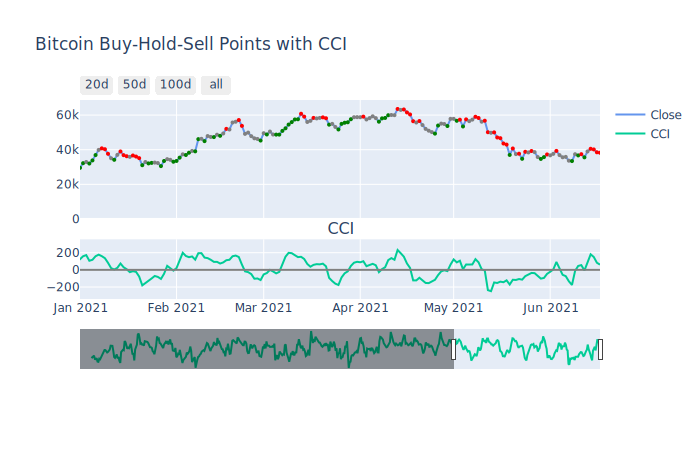

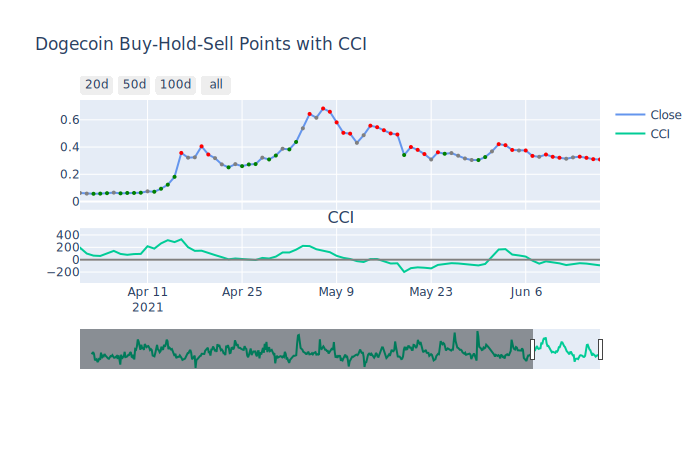

In [20]:
# CCI
custom_params = dict(col='cci', 
                     hlines=[dict(y=0, line_width=2, line_dash='solid', line_color='grey', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

CCI measures the difference between the current price and historical average price.  CCI may be more effective at identifying good buying opportunities for Bitcoin when CCI is well below zero.

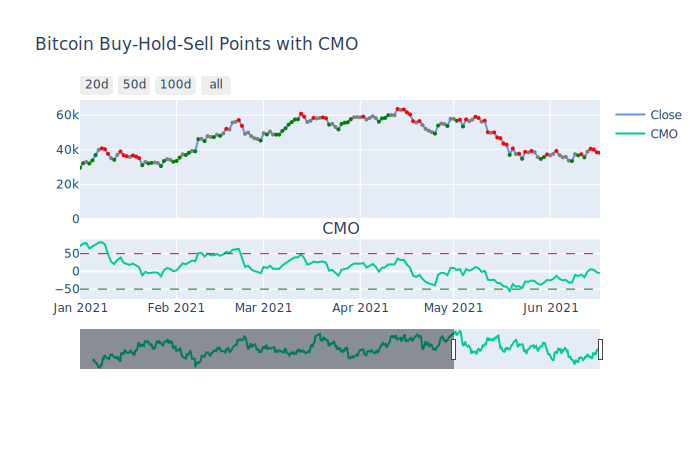

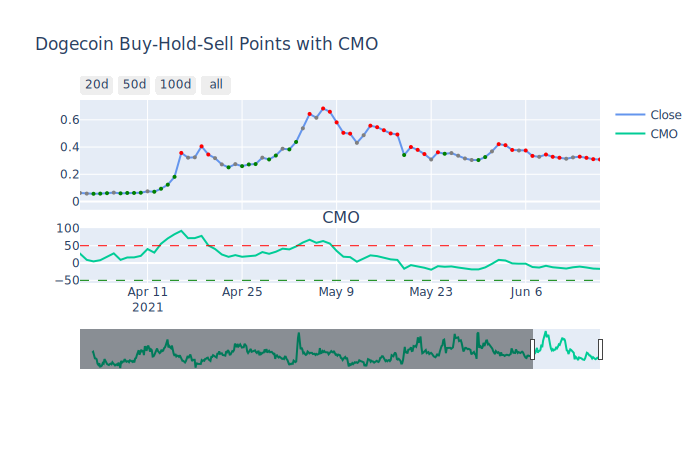

In [21]:
# CMO
custom_params = dict(col='cmo', 
                     hlines=[dict(y=50, line_width=1, line_dash='dash', line_color='red', row=2), 
                             dict(y=-50, line_width=1, line_dash='dash', line_color='green', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

The CMO can be used to identify oversold and overbought levels.  When CMO rises above 50 this is a strong sign the coin is approaching a selling point.

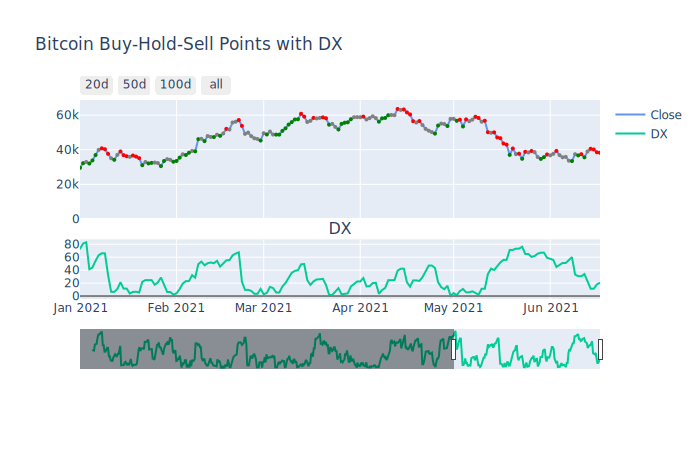

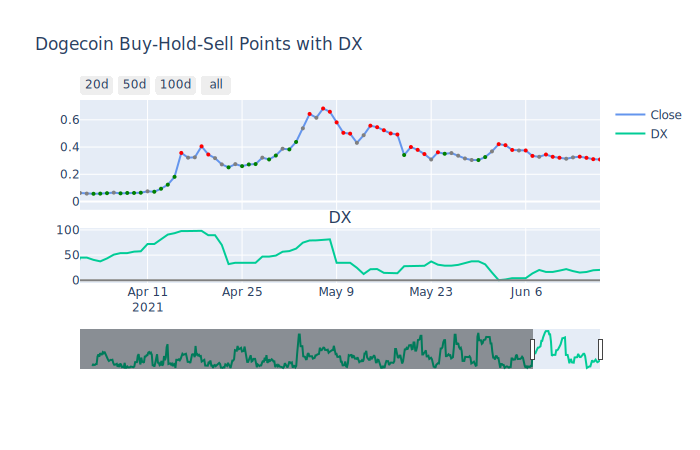

In [22]:
# DX
custom_params = dict(col='dx', 
                     hlines=[dict(y=0, line_width=2, line_dash='solid', line_color='grey', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

# DX here

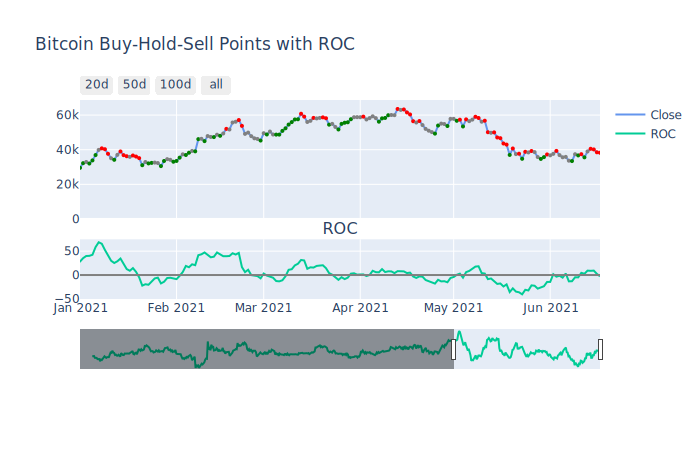

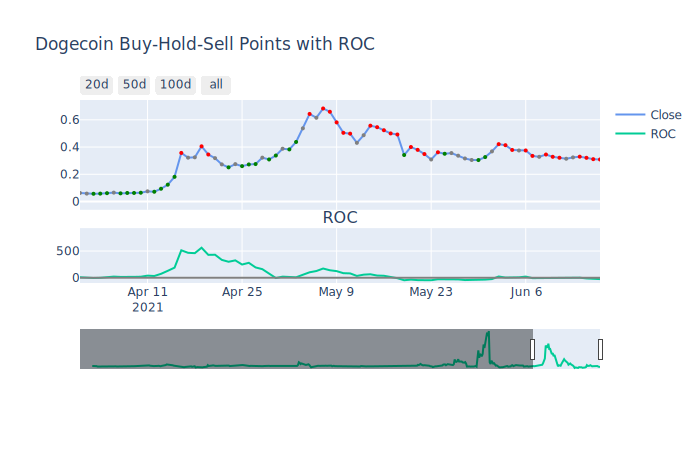

In [23]:
custom_params = dict(col='roc', 
                     hlines=[dict(y=0, line_width=2, line_dash='solid', line_color='grey', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

# ROC here

In [24]:
# RSI
custom_params = dict(col='rsi', 
                     hlines=[dict(y=70, line_width=1, line_dash='dash', line_color='red', row=2), 
                             dict(y=30, line_width=1, line_dash='dash', line_color='green', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

A common investment strategy is to buy when the RSI goes below 30 and sell above 70.  This pattern holds pretty well although for Bitcoin there are troughs where the market rises well before the RSI reaches 30.

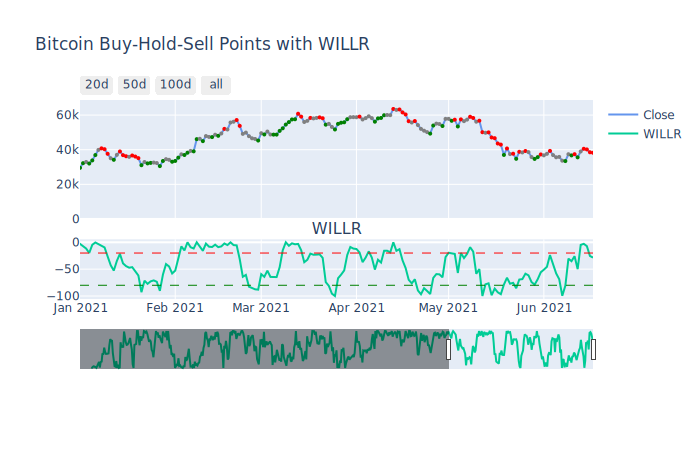

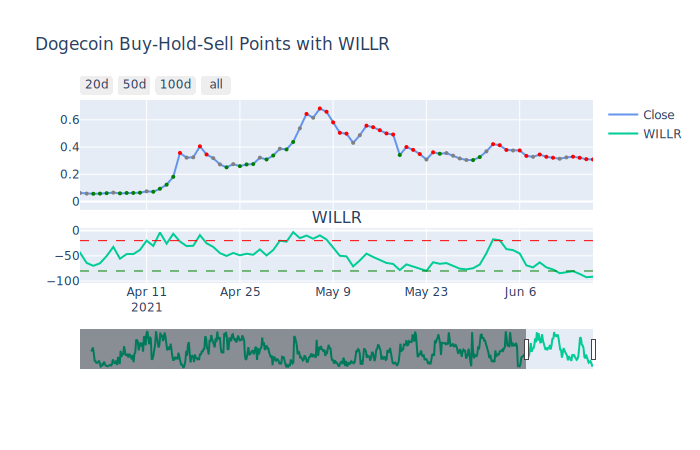

In [25]:
# WILLR
custom_params = dict(col='willr', 
                     hlines=[dict(y=-20, line_width=1, line_dash='dash', line_color='red', row=2), 
                             dict(y=-80, line_width=1, line_dash='dash', line_color='green', row=2)])
for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

# WILLR here

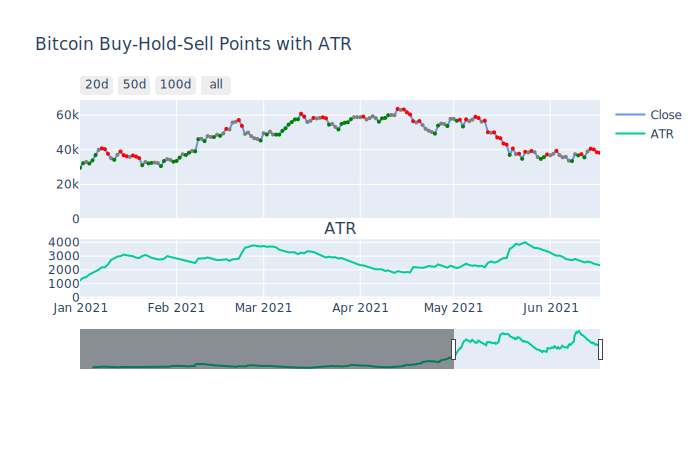

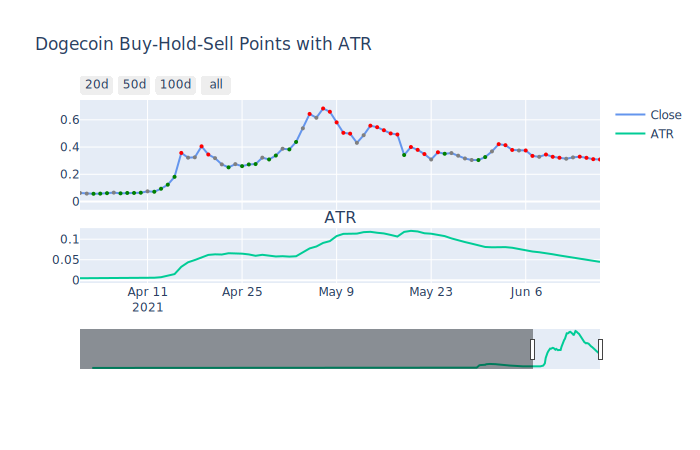

In [26]:
# ATR
custom_params = dict(col='atr', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

# ATR here

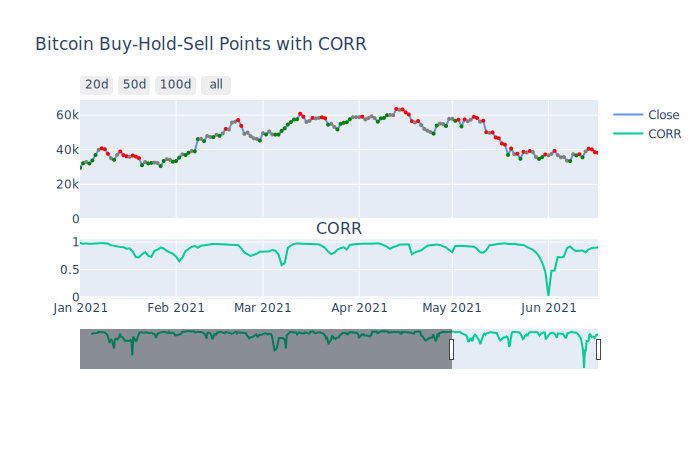

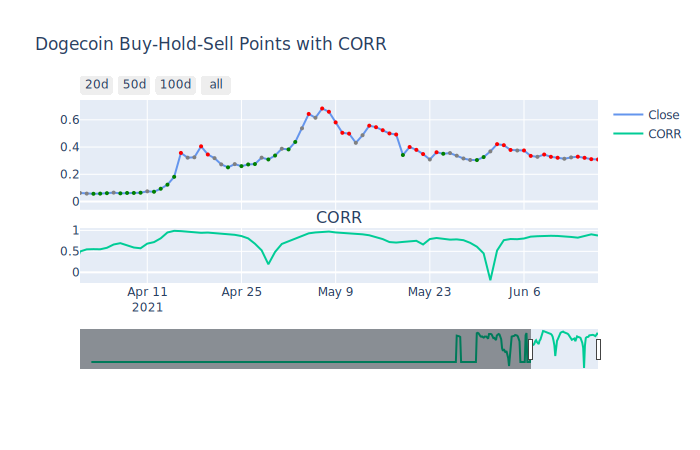

In [27]:
# CORR
custom_params = dict(col='corr', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

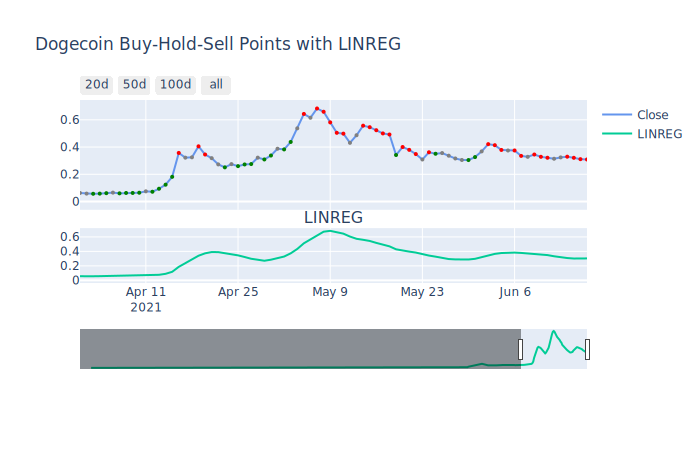

In [28]:
# LINREG
custom_params = dict(col='linreg', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

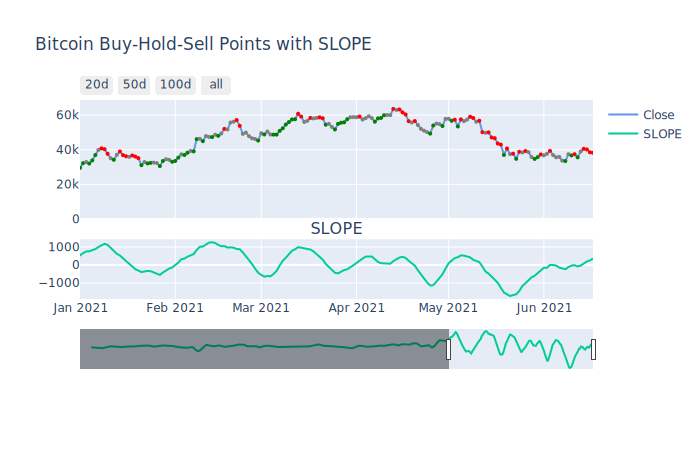

In [29]:
# SLOPE
custom_params = dict(col='slope', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

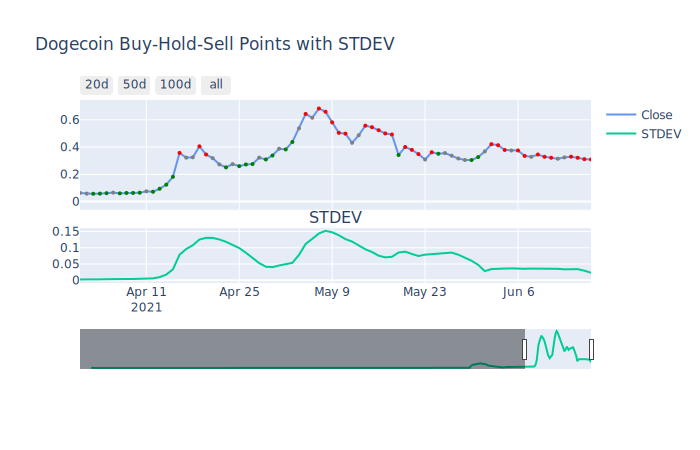

In [30]:
# STDEV
custom_params = dict(col='stdev', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

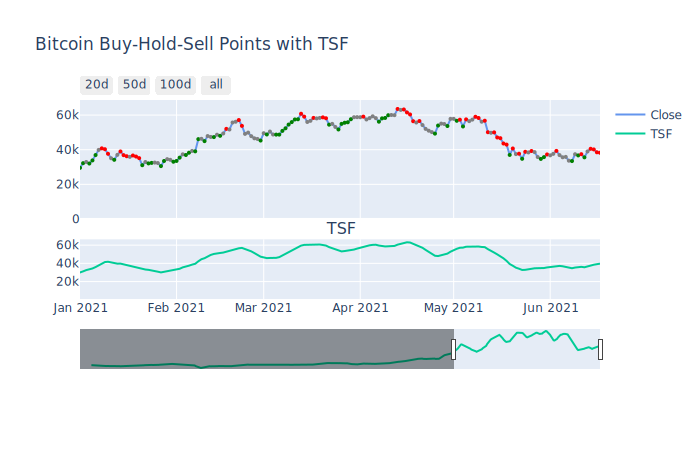

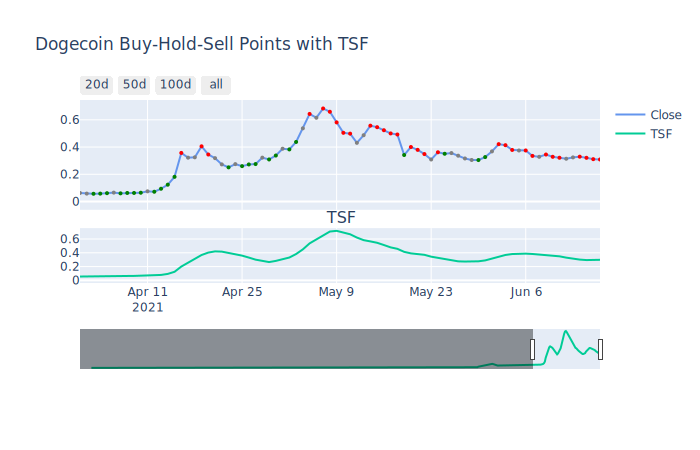

In [31]:
# CORR
custom_params = dict(col='tsf', hlines=[])

for df in dfs:
        generic_ta_plot(df[0], custom_params, sp_params, None, df[1], renderer)

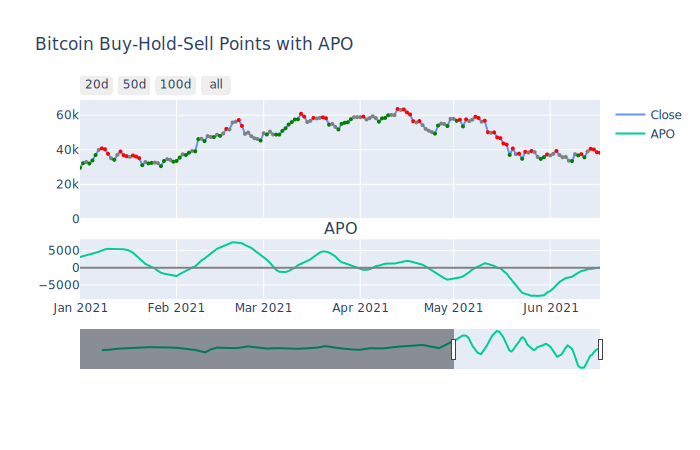

In [32]:
# APO
custom_params = dict(col='apo', 
                     hlines=[dict(y=0, line_width=2, line_dash='solid', line_color='grey', row=2)])

mp_params = dict(fastperiod=12, slowperiod=26, signalperiod=9)

for df in dfs:
        generic_ta_plot(df[0], custom_params, None, mp_params, df[1], renderer)

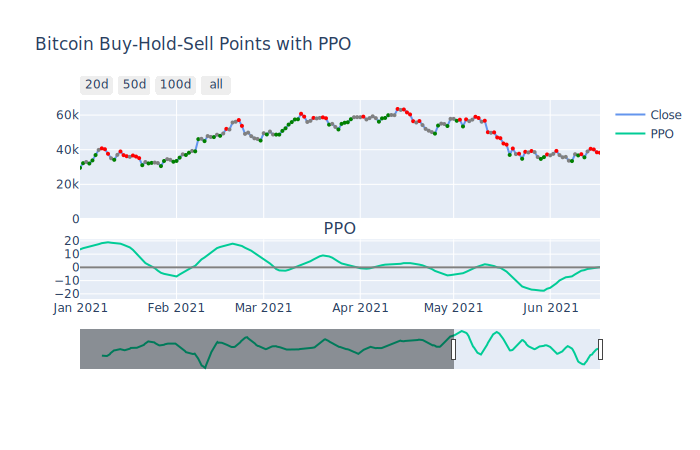

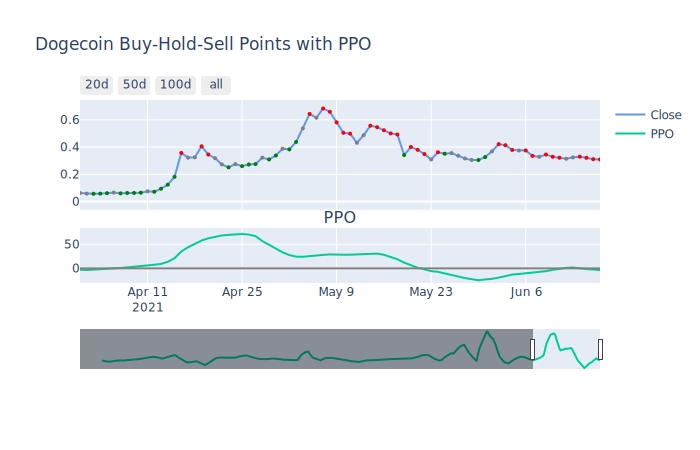

In [33]:
# PPO
custom_params = dict(col='ppo', 
                     hlines=[dict(y=0, line_width=2, line_dash='solid', line_color='grey', row=2)])

for df in dfs:
        generic_ta_plot(df[0], custom_params, None, mp_params, df[1], renderer)

## 2.3 Social Analysis

# WIP

In [34]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2019-11-01 to 2021-06-17
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   asset_id                 595 non-null    int64  
 1   time                     595 non-null    int64  
 2   open                     595 non-null    float64
 3   close                    595 non-null    float64
 4   high                     595 non-null    float64
 5   low                      595 non-null    float64
 6   volume                   595 non-null    float64
 7   market_cap               595 non-null    float64
 8   url_shares               595 non-null    float64
 9   unique_url_shares        595 non-null    float64
 10  reddit_posts             595 non-null    int64  
 11  reddit_posts_score       595 non-null    float64
 12  reddit_comments          595 non-null    int64  
 13  reddit_comments_score    595 non-null    float64
 14  tweets 